In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

In [5]:
# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
 # We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
['measurement', 'station']

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station 

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [13]:
#inspect how the dates are formatted
sample_dates = session.query(Measurement.date).limit(5).all()
for result in sample_dates:
    print(result)

('2010-01-01',)
('2010-01-02',)
('2010-01-03',)
('2010-01-04',)
('2010-01-06',)


In [14]:
#dates are formatted as YYYY-MM-DD
#we will get the maximum date after formatting the dates appropriately
#first is used as there are multiple measurements on the same day
max_date = session.query(func.max(func.strftime("%Y-%m-%d", Measurement.date))).limit(5).all()
max_date[0][0]

'2017-08-23'

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
results = session.query(Measurement.date, Measurement.tobs).\
        filter(Measurement.date >= "2016-08-23", Measurement.date <= "2017-08-23").\
        all()

print(results)

[('2016-08-23', 81.0), ('2016-08-24', 79.0), ('2016-08-25', 80.0), ('2016-08-26', 79.0), ('2016-08-27', 77.0), ('2016-08-28', 78.0), ('2016-08-29', 78.0), ('2016-08-30', 79.0), ('2016-08-31', 80.0), ('2016-09-01', 81.0), ('2016-09-02', 80.0), ('2016-09-03', 79.0), ('2016-09-04', 75.0), ('2016-09-05', 79.0), ('2016-09-06', 76.0), ('2016-09-07', 76.0), ('2016-09-08', 80.0), ('2016-09-09', 79.0), ('2016-09-10', 78.0), ('2016-09-11', 76.0), ('2016-09-12', 78.0), ('2016-09-13', 78.0), ('2016-09-14', 75.0), ('2016-09-15', 79.0), ('2016-09-16', 80.0), ('2016-09-17', 79.0), ('2016-09-18', 81.0), ('2016-09-19', 77.0), ('2016-09-20', 77.0), ('2016-09-21', 78.0), ('2016-09-22', 76.0), ('2016-09-23', 82.0), ('2016-09-24', 81.0), ('2016-09-25', 78.0), ('2016-09-26', 80.0), ('2016-09-27', 80.0), ('2016-09-28', 79.0), ('2016-09-29', 80.0), ('2016-09-30', 80.0), ('2016-10-01', 80.0), ('2016-10-02', 79.0), ('2016-10-03', 79.0), ('2016-10-04', 79.0), ('2016-10-05', 80.0), ('2016-10-06', 80.0), ('2016-10

In [16]:
#access all precipitation data from the last year (as the end of the data is our endpoint, we only need one comparison)
prcp_data = session.query(func.strftime("%Y-%m-%d", Measurement.date), Measurement.prcp).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) >= dt.date(2016, 8, 23)).all()


In [17]:
#load as a dataframe
prcp_df = pd.DataFrame(prcp_data, columns = ['date', 'precipitation'])

#set index
prcp_df.set_index('date', inplace = True)


#look at dataframe
prcp_df.head()


,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [18]:
#sort data frame
prcp_df = prcp_df.sort_values(by = 'date')
prcp_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


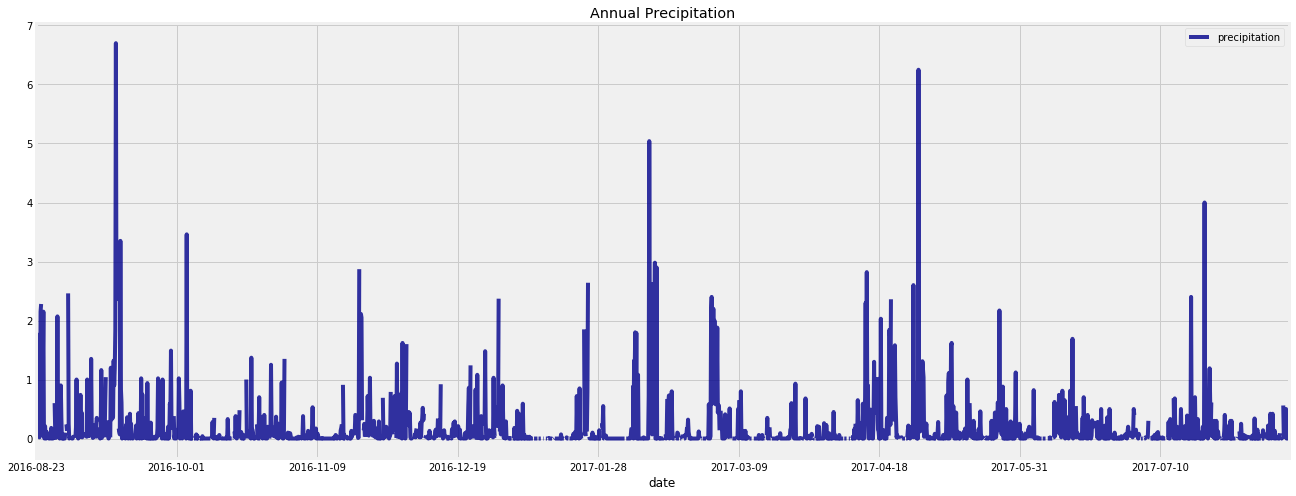

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(title="Annual Precipitation", color='darkblue', alpha=0.8, figsize=(20,8))
plt.legend()
plt.savefig("annual_precipitation.png")
plt.show()

In [20]:
 # Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [21]:
#count distinct stations
nmb_of_stations = session.query(Station.id).distinct().count()
nmb_of_stations


9

In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
count_stations = session.query(Station.station, func.count(Measurement.id)).select_from(Measurement).\
    join(Station, Measurement.station == Station.station).group_by(Station.station).\
    order_by(func.count(Measurement.id).desc()).all()

for result in count_stations:
    print(f"Station: {result[0]}\tCount: {result[1]}")

Station: USC00519281	Count: 2772
Station: USC00519397	Count: 2724
Station: USC00513117	Count: 2709
Station: USC00519523	Count: 2669
Station: USC00516128	Count: 2612
Station: USC00514830	Count: 2202
Station: USC00511918	Count: 1979
Station: USC00517948	Count: 1372
Station: USC00518838	Count: 511


In [24]:
mostactive_station = 'USC00519281'
summary_temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == mostactive_station).all()
print(f"Lowest Temperature: {summary_temps[0][0]} Fahrenheit")
print(f"Highest Temperature: {summary_temps[0][1]} Fahrenheit")
print(f"Average Temperature: {round(summary_temps[0][2], 2)} Fahrenheit")

Lowest Temperature: 54.0 Fahrenheit
Highest Temperature: 85.0 Fahrenheit
Average Temperature: 71.66 Fahrenheit


In [26]:
#get temperature data for most active station over final 12 months of data
yearly_temps = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == mostactive_station).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) >= dt.date(2016, 8, 23)).all()

#save as a data frame
yearlytemps_df = pd.DataFrame(yearly_temps, columns = ['date', 'temperature'])
yearlytemps_df.head()

,date,temperature
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


In [27]:
#index by date
yearlytemps_df.set_index('date', inplace = True)

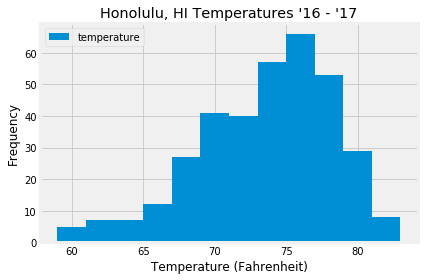

In [29]:
#plot histogram
fig, ax = plt.subplots()
yearlytemps_df.plot.hist(bins = 12, ax = ax)

#set labels
ax.set_xlabel('Temperature (Fahrenheit)')
ax.set_ylabel('Frequency')
ax.set_title("Honolulu, HI Temperatures '16 - '17")

#save figure
plt.savefig("temp_hist.png")

#plot
plt.tight_layout()
plt.show()